In [7]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import missingno


In [6]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


The data contains 22 columns providing the following information:

- transID: A unique transaction ID for each transaction.
- payCardID: The primary identification of the customer. The card that the customer uses for entry and exit.
- payCardBank: The name of the bank that issued the customer's card.
- payCardName: The name of the customer printed on the card.
- payCardSex: The gender of the customer as printed on the card.
- payCardBirthDate: The birth year of the customer.
- corridorID: The ID of the corridor/route used as a key for route grouping.
- corridorName: The name of the corridor/route, which includes the starting and ending points of each route.
- direction: 0 for "Outbound," 1 for "Inbound." This indicates the direction of the route.
- tapInStops: The ID of the Tap-In stop used to identify the stop name.
- tapInStopsName: The name of the Tap-In stop where the customer tapped in.
- tapInStopsLat: The latitude of the Tap-In stop.
- tapInStopsLon: The longitude of the Tap-In stop.
- stopStartSeq: The sequence of stops, indicating the first stop, second stop, and so on, related to the direction.
- tapInTime: The Tap-In time. This includes both the date and time.
- tapOutStops: The ID of the Tap-Out stop used to identify the stop name.
- tapOutStopsName: The name of the Tap-Out stop where the customer tapped out.
- tapOutStopsLat: The latitude of the Tap-Out stop.
- tapOutStopsLon: The longitude of the Tap-Out stop.
- stopEndSeq: The sequence of stops, indicating the first stop, second stop, and so on, related to the direction.
- tapOutTime: The Tap-Out time. This includes both the date and time.

In [37]:
# check the number of rows and columns
df.shape

(37900, 22)

In [39]:
df.dtypes

transID              object
payCardID             int64
payCardBank          object
payCardName          object
payCardSex           object
payCardBirthDate      int64
corridorID           object
corridorName         object
direction           float64
tapInStops           object
tapInStopsName       object
tapInStopsLat       float64
tapInStopsLon       float64
stopStartSeq          int64
tapInTime            object
tapOutStops          object
tapOutStopsName      object
tapOutStopsLat      float64
tapOutStopsLon      float64
stopEndSeq          float64
tapOutTime           object
payAmount           float64
dtype: object

In [4]:
# gives you summary statistics for each column in the DataFrame. 
# This includes the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payCardID,37900.0,4.250060e+17,1.321699e+18,6.040368e+10,1.800442e+14,3.507947e+15,4.699023e+15,4.997694e+18
payCardBirthDate,37900.0,1.990089e+03,1.305148e+01,1.946000e+03,1.982000e+03,1.990000e+03,2.001000e+03,2.012000e+03
direction,37900.0,5.006332e-01,5.000062e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tapInStopsLat,37900.0,-6.214838e+00,5.791123e-02,-6.394973e+00,-6.245863e+00,-6.214587e+00,-6.175528e+00,-6.089429e+00
tapInStopsLon,37900.0,1.068416e+02,6.036945e-02,1.066147e+02,1.068035e+02,1.068348e+02,1.068823e+02,1.070239e+02
stopStartSeq,37900.0,1.357248e+01,1.223762e+01,0.000000e+00,4.000000e+00,1.000000e+01,1.900000e+01,6.800000e+01
tapOutStopsLat,36556.0,-6.214651e+00,5.902203e-02,-6.394973e+00,-6.247225e+00,-6.214718e+00,-6.174736e+00,-6.091746e+00
tapOutStopsLon,36556.0,1.068412e+02,6.099946e-02,1.066147e+02,1.068017e+02,1.068346e+02,1.068830e+02,1.070237e+02
stopEndSeq,36556.0,2.121991e+01,1.380069e+01,1.000000e+00,1.100000e+01,1.800000e+01,2.900000e+01,7.700000e+01
payAmount,36893.0,2.699713e+03,4.212226e+03,0.000000e+00,0.000000e+00,3.500000e+03,3.500000e+03,2.000000e+04


<Axes: >

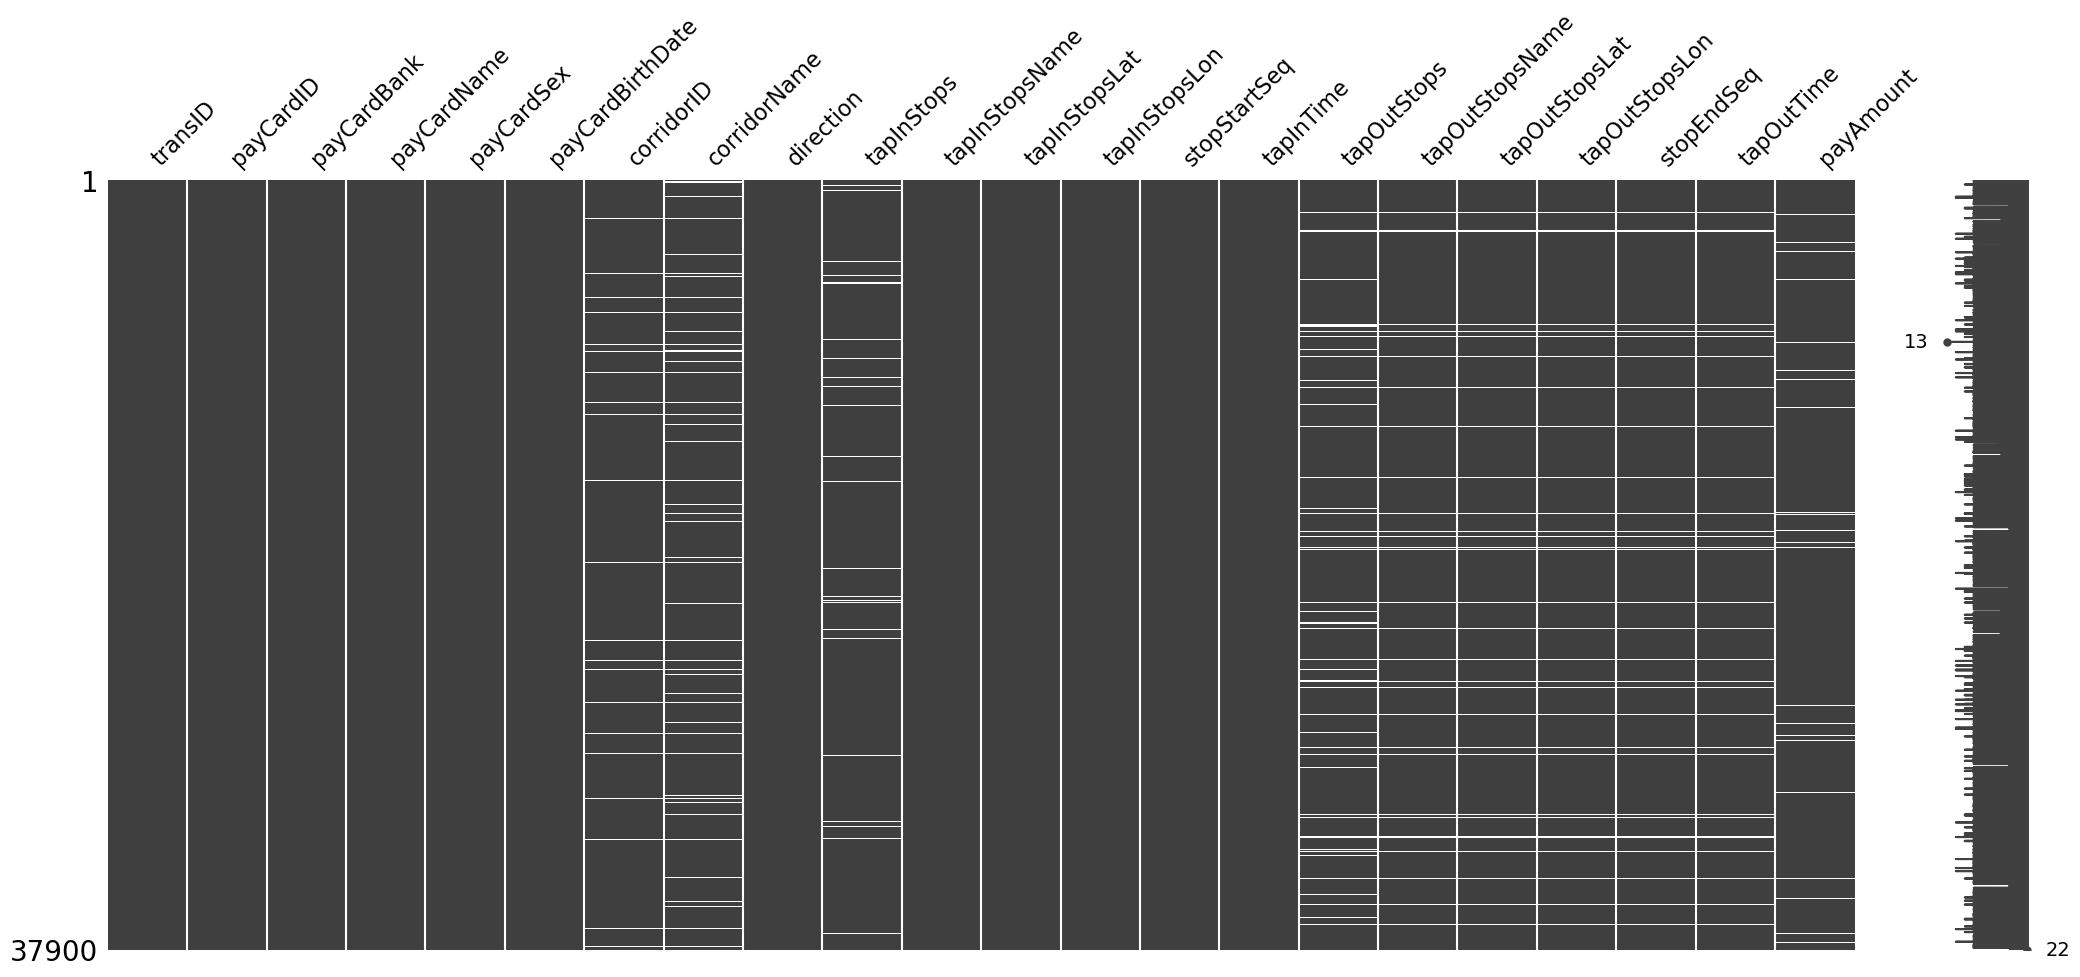

In [8]:
missingno.matrix(df)

In [9]:
# Calculate the sum of missing values for each column
missing_values_sum = df.isna().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values_sum / df.shape[0]) * 100

# Combine the sum and percentage into a single DataFrame
missing_data = pd.DataFrame({
    'Missing Values': missing_values_sum,
    'Percentage': missing_values_percentage.round(2)  # round to 2 decimal places for readability
})

# Display the combined DataFrame
print(missing_data)

                  Missing Values  Percentage
transID                        0        0.00
payCardID                      0        0.00
payCardBank                    0        0.00
payCardName                    0        0.00
payCardSex                     0        0.00
payCardBirthDate               0        0.00
corridorID                  1257        3.32
corridorName                1930        5.09
direction                      0        0.00
tapInStops                  1213        3.20
tapInStopsName                 0        0.00
tapInStopsLat                  0        0.00
tapInStopsLon                  0        0.00
stopStartSeq                   0        0.00
tapInTime                      0        0.00
tapOutStops                 2289        6.04
tapOutStopsName             1344        3.55
tapOutStopsLat              1344        3.55
tapOutStopsLon              1344        3.55
stopEndSeq                  1344        3.55
tapOutTime                  1344        3.55
payAmount 

In [10]:
# check the number of unique values in each column
df.nunique()

transID             37900
payCardID            2000
payCardBank             6
payCardName          1993
payCardSex              2
payCardBirthDate       67
corridorID            221
corridorName          216
direction               2
tapInStops           2570
tapInStopsName       2602
tapInStopsLat        2587
tapInStopsLon        2458
stopStartSeq           67
tapInTime           37079
tapOutStops          2230
tapOutStopsName      2248
tapOutStopsLat       2237
tapOutStopsLon       2139
stopEndSeq             74
tapOutTime          35908
payAmount               3
dtype: int64

In [44]:
#numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
{"numerical_columns": numerical_columns}

{'numerical_columns': ['payCardID',
  'payCardBirthDate',
  'direction',
  'tapInStopsLat',
  'tapInStopsLon',
  'stopStartSeq',
  'tapOutStopsLat',
  'tapOutStopsLon',
  'stopEndSeq',
  'payAmount']}

In [45]:
#categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
{"categorical_columns": categorical_columns}


{'categorical_columns': ['transID',
  'payCardBank',
  'payCardName',
  'payCardSex',
  'corridorID',
  'corridorName',
  'tapInStops',
  'tapInStopsName',
  'tapInTime',
  'tapOutStops',
  'tapOutStopsName',
  'tapOutTime']}

In [13]:

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a DataFrame to display both
column_info = pd.DataFrame.from_dict({
    'Numerical Columns': numerical_columns,
    'Categorical Columns': categorical_columns
}, orient='index').transpose()

# Display the result
column_info

,Numerical Columns,Categorical Columns
0,payCardID,transID
1,payCardBirthDate,payCardBank
2,direction,payCardName
3,tapInStopsLat,payCardSex
4,tapInStopsLon,corridorID
5,stopStartSeq,corridorName
6,tapOutStopsLat,tapInStops
7,tapOutStopsLon,tapInStopsName
8,stopEndSeq,tapInTime
9,payAmount,tapOutStops


In [6]:
# Perform a normality test on each numerical column
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Initialize an empty list to store the results
results = []

# Perform a normality test on each numerical column
for column in numeric_cols:
    p_value_normaltest = stats.normaltest(df[column].dropna())[1]
    p_value_kstest = stats.kstest(df[column].dropna(), 'norm')[1]
    p_value_shapiro = stats.shapiro(df[column].dropna())[1]
    p_value_lilliefors = lilliefors(df[column].dropna())[1]
    
    # Append the results for the current column
    results.append({
        'Column': column,
        'D Agostino-Pearson Test p-value': p_value_normaltest,
        'Kolmogorov-Smirnov Test p-value': p_value_kstest,
        'Shapiro-Wilk Test p-value': p_value_shapiro,
        'Lilliefors Test p-value': p_value_lilliefors,
        'D Agostino-Pearson Test': 'Not Normal' if p_value_normaltest < 0.05 else 'Normal',
        'Kolmogorov-Smirnov Test': 'Not Normal' if p_value_kstest < 0.05 else 'Normal',
        'Shapiro-Wilk Test': 'Not Normal' if p_value_shapiro < 0.05 else 'Normal',
        'Lilliefors Test': 'Not Normal' if p_value_lilliefors < 0.05 else 'Normal'
    })

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results as a table
results_df


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column,D Agostino-Pearson Test p-value,Kolmogorov-Smirnov Test p-value,Shapiro-Wilk Test p-value,Lilliefors Test p-value,D Agostino-Pearson Test,Kolmogorov-Smirnov Test,Shapiro-Wilk Test,Lilliefors Test
0,payCardID,0.000000e+00,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
1,payCardBirthDate,6.566679e-218,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
2,direction,0.000000e+00,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
3,tapInStopsLat,4.936625e-112,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
4,tapInStopsLon,3.373017e-91,0.0,3.540465e-40,0.001,Not Normal,Not Normal,Not Normal,Not Normal
5,stopStartSeq,0.000000e+00,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
6,tapOutStopsLat,4.562570e-124,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
7,tapOutStopsLon,1.223643e-58,0.0,2.007851e-36,0.001,Not Normal,Not Normal,Not Normal,Not Normal
8,stopEndSeq,0.000000e+00,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal
9,payAmount,0.000000e+00,0.0,0.000000e+00,0.001,Not Normal,Not Normal,Not Normal,Not Normal


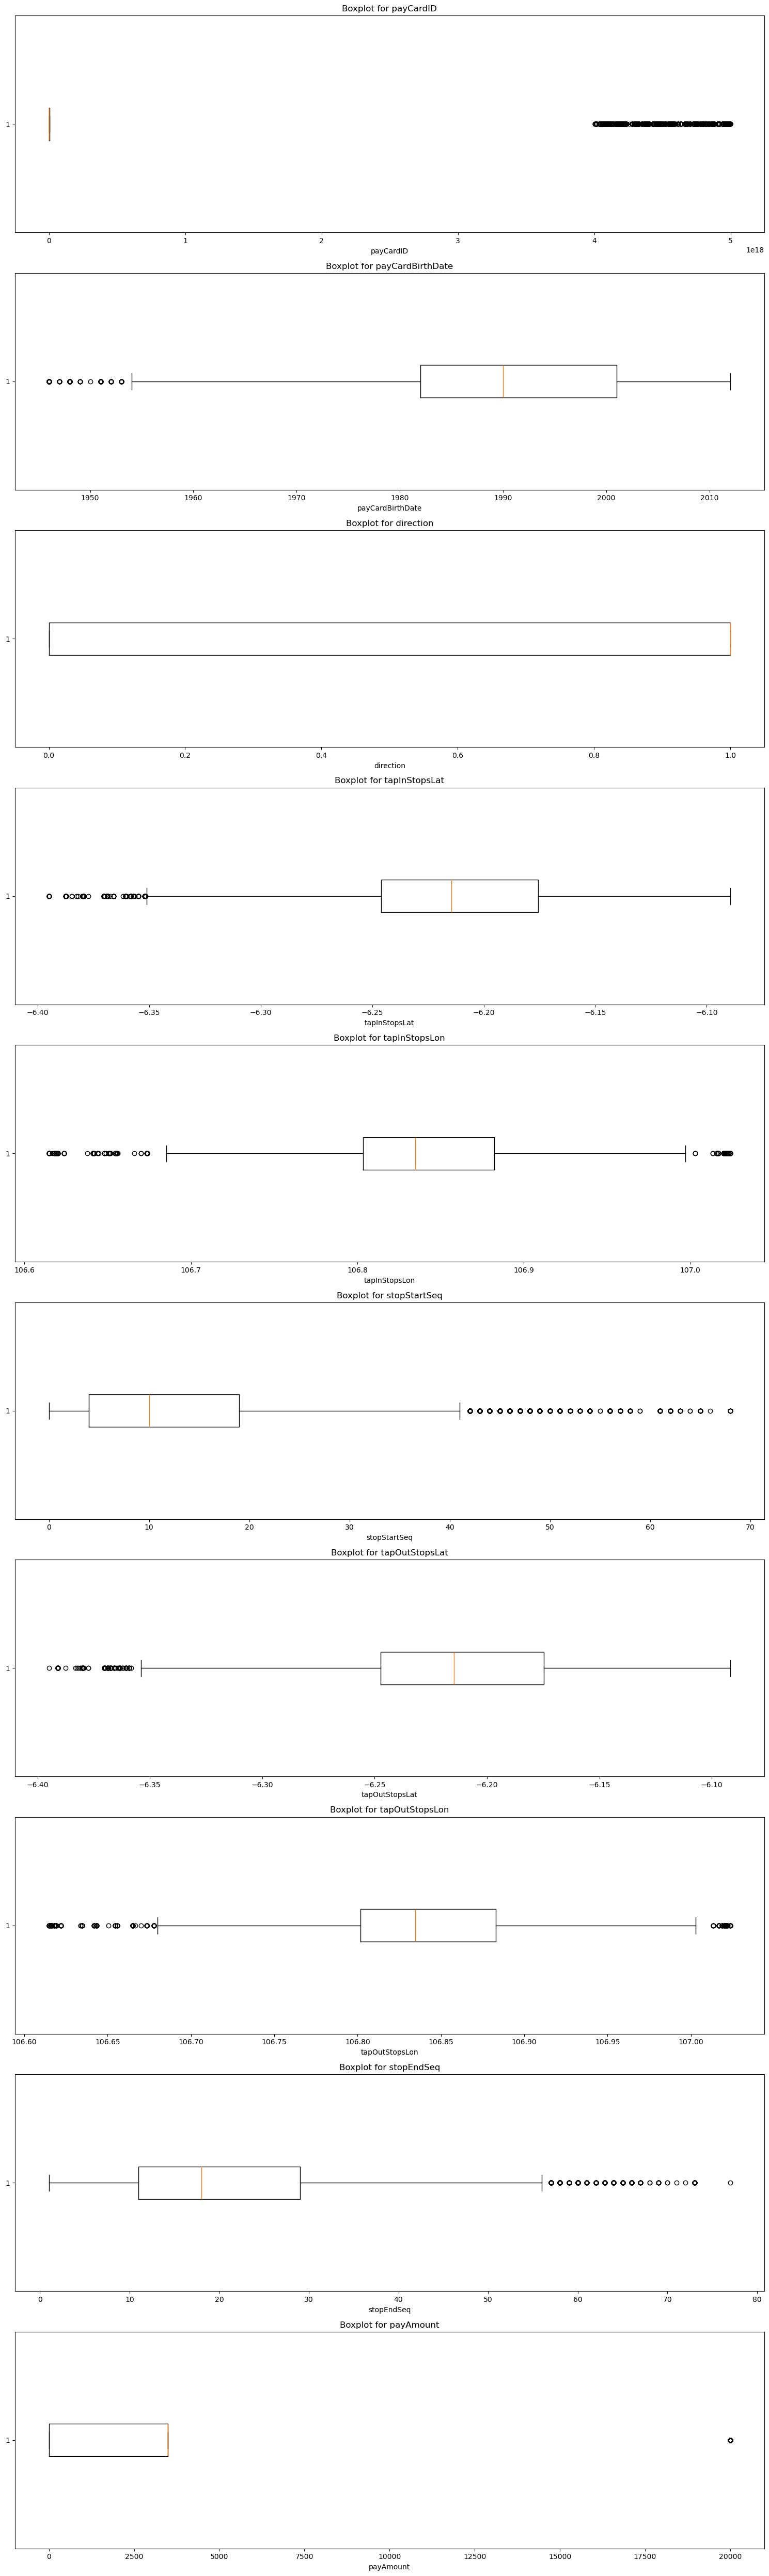

In [16]:
# Select numeric columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for all numerical columns
plt.figure(figsize=(15, len(numerical_columns) * 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Most of the variables display a significant number of outliers, indicating that there are many data points that deviate substantially from the central distribution.

In [14]:
# This code will identify outliers from all numerical columns in the dataframe using the IQR method.
# The Interquartile Range (IQR) method is a commonly used technique to detect outliers, especially for data that is not normally distributed.
# If your data is normally distributed, the Z-score method might be a better choice

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Initialize an empty DataFrame to store outliers
outliers = pd.DataFrame()

# Loop through each numeric column to identify outliers
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers for the current column
    outliers_temp = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Combine outliers, avoiding duplicates
    outliers = pd.concat([outliers, outliers_temp]).drop_duplicates().reset_index(drop=True)

# Count the number of unique outlier rows
outliers_count = outliers.shape[0]

print('Number of outliers:', outliers_count)

# Optional: Display the outliers DataFrame
outliers

Number of outliers: 7683


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,XDMP644Z5Y29DB,4556326832434362836,brizzi,Sari Nababan,F,2004,13,Ciledug - Tendean,1.0,P00096,...,106.75488,10,2023-04-03 06:49:48,P00001,Adam Malik,-6.236466,106.74786,11.0,2023-04-03 07:47:42,3500.0
1,IXJW013G5W79VX,4428582927102421723,brizzi,"dr. Belinda Handayani, S.E.",M,2002,JAK.02,Kampung Melayu - Duren Sawit,0.0,B02665P,...,106.90243,29,2023-04-03 06:36:49,B00636P,Gereja Santa Anna 1,-6.233953,106.90998,33.0,2023-04-03 07:13:58,0.0
2,NNAE999Q4V92XM,4189640459822695962,brizzi,Mutia Mayasari,M,1978,JAK.77,Tanjung Priok - Jembatan Item,0.0,B06877P,...,106.85721,1,2023-04-03 05:11:15,B06065P,Puskesmas Sunter Agung I,-6.132513,106.85557,9.0,2023-04-03 05:35:24,0.0
3,QRFR658M6P01AH,4730280883020443501,brizzi,Zamira Puspita,M,1977,B11,Summarecon Bekasi - BNN,0.0,B01728P,...,106.94651,5,2023-04-03 06:08:56,B00232P,Cawang Blue Bird,-6.248836,106.87801,6.0,2023-04-03 06:41:37,3500.0
4,PEGV120E5W96OH,4074114259011835374,brizzi,Vero Hutagalung,F,1983,JAK.31,Blok M - Andara,0.0,B03711P,...,106.80430,18,2023-04-03 06:07:43,B05388P,SMPN 68,-6.278279,106.79964,30.0,2023-04-03 06:44:41,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7678,ODEN980A0H13RP,349361081404960,emoney,Uda Haryanto,F,1991,S31,Bintaro - Fatmawati,1.0,B00229P,...,106.77680,4,2023-04-18 09:29:02,B00148P,Bintaro Xchange,-6.286813,106.72865,5.0,2023-04-18 10:54:54,20000.0
7679,KLER039H4G85TS,3547463230183083,dki,"Drs. Icha Laksita, S.E.",F,1992,B14,Bekasi Barat - Kuningan,0.0,B00163P,...,106.83291,9,2023-04-30 14:11:24,B02103P,Kuningan Madya 2,-6.213358,106.83027,13.0,2023-04-30 15:28:57,20000.0
7680,WKIT490S3J82GY,6011018350339285,dki,dr. Indra Maryati,M,2007,B14,Bekasi Barat - Kuningan,0.0,B00664P,...,106.83189,11,2023-04-15 05:50:30,B02103P,Kuningan Madya 2,-6.213358,106.83027,13.0,2023-04-15 06:31:02,20000.0
7681,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,...,106.78282,4,2023-04-16 07:59:08,NaN,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0


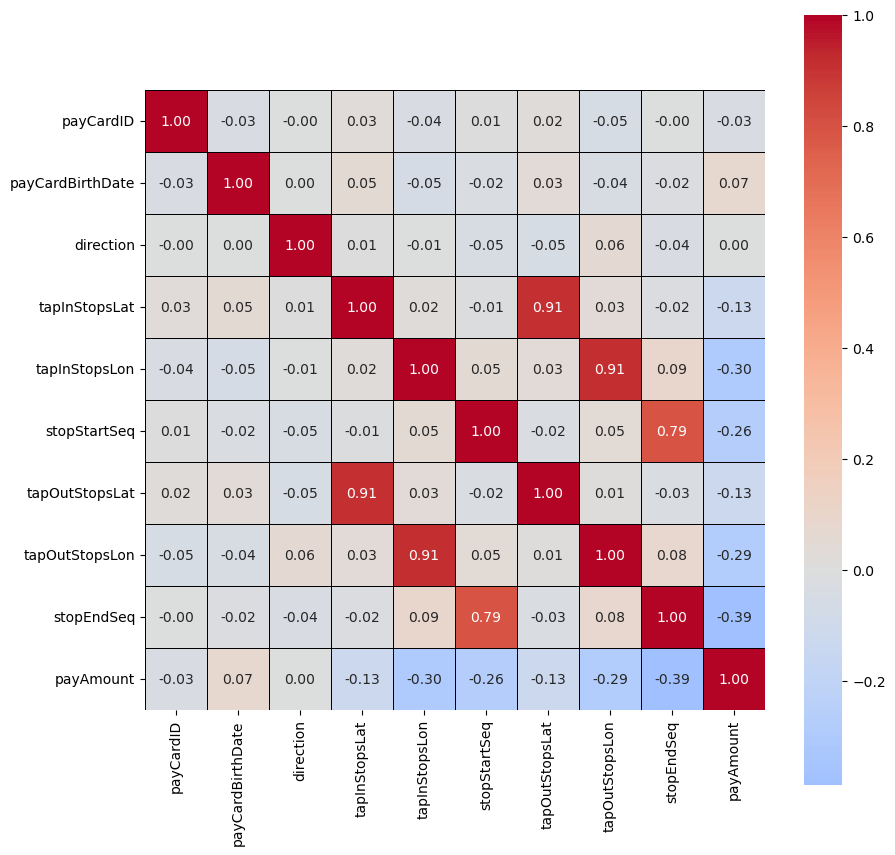

In [11]:
# Assumptions:
# No assumptions about the distribution of the data (non-parametric).
# The data should be continuous or discrete.
# Spearman rank correlation is more robust to outliers and non-normality, .

# Compute the correlation matrix (non-parametric)  
correlation_matrix = df.corr(method='spearman', numeric_only=True)  
  
# Create a heatmap  
plt.figure(figsize=(10,10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, linecolor='black', square=True)  
  
# Display the heatmap  
plt.show()  